<img src="https://storage.googleapis.com/gweb-uniblog-publish-prod/original_images/YT_Music.jpg" width="300">

# 5. Spotify Data Analyis

In this project we'll do some analysis of music data.  We want to understand more about the behaviour of songs that hit #1 on the charts.

Lets investigate how they go up and down in popularity over time and then look at their song features to see if there is anything interesting about their features, and how they behave on the charts.



In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


# Loading SQL Data

Lets load up data from the top 200 global charts available.

These are available on Kaggle at:
* https://www.kaggle.com/dhruvildave/spotify-charts (SQLlite)
* https://www.kaggle.com/bartomiejczyewski/spotify-top-200-weekly-global-20172021

We'll use the SQL Lite database since it is more up to date, and has daily information


In [16]:
import sqlite3

con = sqlite3.connect('datasets/spotify/charts.sqlite')

To get our data, we query the database using SQL.  This is probably the most simple query.  

In [17]:
charts = pd.read_sql_query("SELECT * from 'top200'", con)
charts.head()

,title,rank,date,artist,url,trend,streams
0,good 4 u,1,2021-06-23,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,7397613
1,Todo De Ti,2,2021-06-23,Rauw Alejandro,https://open.spotify.com/track/4fSIb4hdOQ151TI...,SAME_POSITION,5138644
2,MONTERO (Call Me By Your Name),3,2021-06-23,Lil Nas X,https://open.spotify.com/track/67BtfxlNbhBmCDR...,SAME_POSITION,5089504
3,Yonaguni,4,2021-06-23,Bad Bunny,https://open.spotify.com/track/2JPLbjOn0wPCngE...,SAME_POSITION,4936579
4,Kiss Me More (feat. SZA),5,2021-06-23,Doja Cat,https://open.spotify.com/track/748mdHapucXQri7...,SAME_POSITION,4612404


If we wanted to we can filter the query further using SQL. E.g. to get the records where the streams was more than 3M

In [18]:
pd.read_sql_query("SELECT * from top200 where streams>3000000", con)

,title,rank,date,artist,url,trend,streams
0,good 4 u,1,2021-06-23,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,7397613
1,Todo De Ti,2,2021-06-23,Rauw Alejandro,https://open.spotify.com/track/4fSIb4hdOQ151TI...,SAME_POSITION,5138644
2,MONTERO (Call Me By Your Name),3,2021-06-23,Lil Nas X,https://open.spotify.com/track/67BtfxlNbhBmCDR...,SAME_POSITION,5089504
3,Yonaguni,4,2021-06-23,Bad Bunny,https://open.spotify.com/track/2JPLbjOn0wPCngE...,SAME_POSITION,4936579
4,Kiss Me More (feat. SZA),5,2021-06-23,Doja Cat,https://open.spotify.com/track/748mdHapucXQri7...,SAME_POSITION,4612404
...,...,...,...,...,...,...,...
13976,Closer,2,2017-01-03,"The Chainsmokers, Halsey",https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,SAME_POSITION,3175128
13977,Starboy,1,2017-01-02,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,SAME_POSITION,3342769
13978,Closer,2,2017-01-02,"The Chainsmokers, Halsey",https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,SAME_POSITION,3019058
13979,Starboy,1,2017-01-01,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,SAME_POSITION,3135625


SQL is very powerful and includes many of the features implemented in pandas.

For more information on SQL and SQLite:

* https://www.w3schools.com/sql/
* https://www.sqlite.org/index.html


In [19]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326200 entries, 0 to 326199
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    326200 non-null  object
 1   rank     326200 non-null  int64 
 2   date     326200 non-null  object
 3   artist   326200 non-null  object
 4   url      326200 non-null  object
 5   trend    326200 non-null  object
 6   streams  326200 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 17.4+ MB


# Cleaning and Preparing Data

First we'll change the date strings to real datatime data structures for analysis.

In [20]:
charts['date']= pd.to_datetime(charts['date'])

In [21]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326200 entries, 0 to 326199
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    326200 non-null  object        
 1   rank     326200 non-null  int64         
 2   date     326200 non-null  datetime64[ns]
 3   artist   326200 non-null  object        
 4   url      326200 non-null  object        
 5   trend    326200 non-null  object        
 6   streams  326200 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 17.4+ MB


We have 326199 rows!

# Focus on Number 1 Songs

First, we'll get only the rows for songs that hit number one.

In [22]:
number_one_ranks = charts[charts['rank'] == 1]
number_one_ranks

,title,rank,date,artist,url,trend,streams
0,good 4 u,1,2021-06-23,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,7397613
200,good 4 u,1,2021-06-22,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,7973877
400,good 4 u,1,2021-06-21,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,7851007
600,good 4 u,1,2021-06-20,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,7403306
800,good 4 u,1,2021-06-19,Olivia Rodrigo,https://open.spotify.com/track/4ZtFanR9U6ndgdd...,SAME_POSITION,8221390
...,...,...,...,...,...,...,...
325200,Starboy,1,2017-01-05,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,SAME_POSITION,3579206
325400,Starboy,1,2017-01-04,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,SAME_POSITION,3619247
325600,Starboy,1,2017-01-03,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,SAME_POSITION,3563076
325800,Starboy,1,2017-01-02,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,SAME_POSITION,3342769


In [23]:
number_one_list = number_one_ranks['title'].unique()
number_one_list

array(['good 4 u', 'MONTERO (Call Me By Your Name)', 'a m a r i',
       'Peaches (feat. Daniel Caesar & Giveon)', 'drivers license',
       'What’s Next', 'DÁKITI', 'All I Want for Christmas Is You',
       'willow', 'positions', 'Mood (feat. iann dior)',
       'WAP (feat. Megan Thee Stallion)', 'Dynamite',
       'Savage Love (Laxed - Siren Beat)', 'my future',
       'ROCKSTAR (feat. Roddy Ricch)', 'cardigan', 'Blinding Lights',
       'Rain On Me (with Ariana Grande)',
       'Stuck with U (with Justin Bieber)', 'Toosie Slide', 'THE SCOTTS',
       'Dance Monkey', 'No Time To Die', 'The Box', 'everything i wanted',
       'Lose You To Love Me', 'HIGHEST IN THE ROOM', 'Señorita',
       'Circles', "I Don't Care (with Justin Bieber)", 'bad guy',
       'ME! (feat. Brendon Urie of Panic! At The Disco)', '7 rings',
       'Con Calma', 'Sunflower - Spider-Man: Into the Spider-Verse',
       'thank u, next', 'Wow.',
       'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
       'MIA (f

Lets get all of the rows containing number one songs including the weeks where they weren't number one so we can see how they rise in the chart.

This is done by only keeping the rows where the Track field is in the list.

In [24]:
number_ones = charts.loc[charts.title.isin(number_one_list)]
number_ones[['date','title', 'artist', 'streams']].head()

,date,title,artist,streams
0,2021-06-23,good 4 u,Olivia Rodrigo,7397613
2,2021-06-23,MONTERO (Call Me By Your Name),Lil Nas X,5089504
8,2021-06-23,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,3640232
16,2021-06-23,drivers license,Olivia Rodrigo,2634188
23,2021-06-23,Blinding Lights,The Weeknd,2231005


Now, lets pivot the list so we can create a time series graph with the week as the index, and the songs as the columns.  We'll use pivot_table for this.

In [25]:
streams_by_song = number_ones.pivot_table(index=['date'], columns='title',values='streams')


Now that we have the number of streams by song for every day, lets look at the overall trend for these songs.

<AxesSubplot:xlabel='date'>

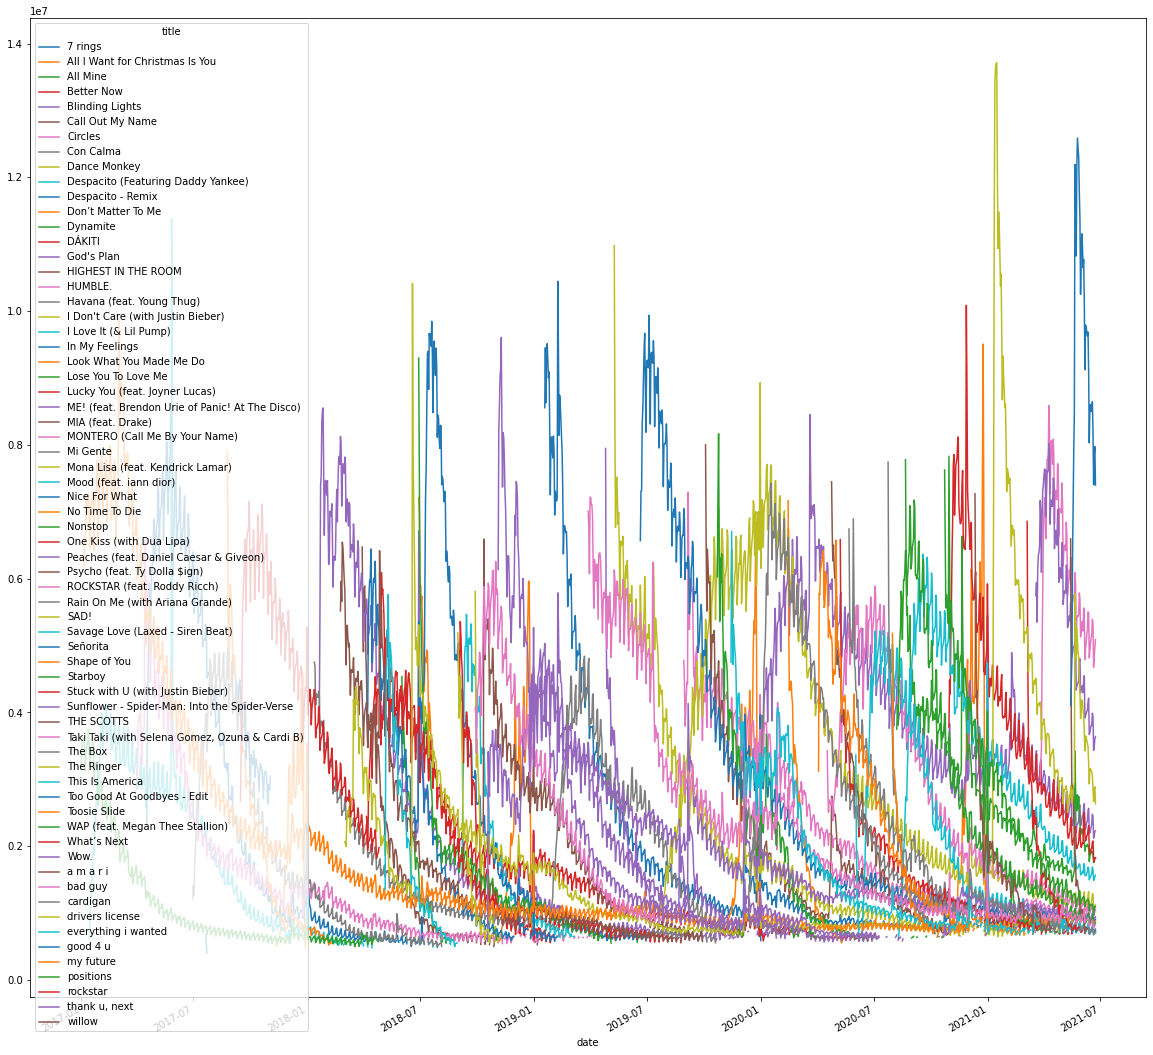

In [26]:
streams_by_song.plot(figsize=(20,20))


Wow - too much information! Lets look at one song at a time.  'All I want for Christmas' is a popular one.

<AxesSubplot:xlabel='date'>

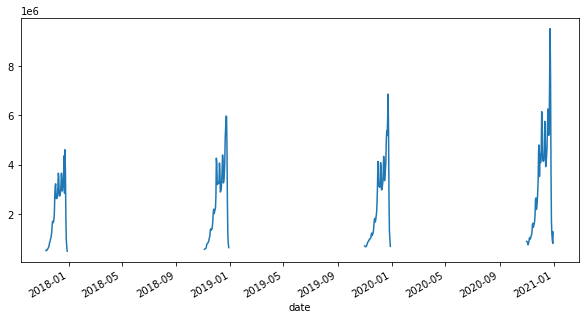

In [135]:
streams_by_song['All I Want for Christmas Is You'].plot(figsize=(10,5))



# Reindexing Time Series Data

Another way we could have got this graph about a single song is by filtering the daily data streams before we pivoted.  This causes a problem though.

<AxesSubplot:xlabel='date'>

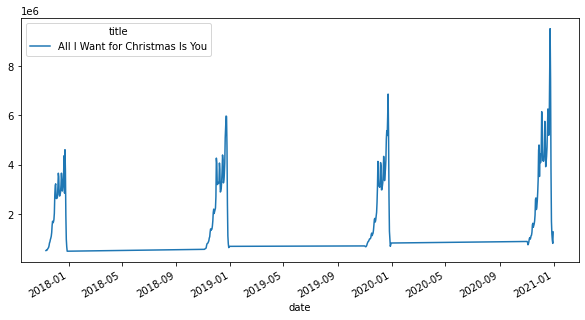

In [136]:
number_ones = charts.loc[charts.title.isin(['All I Want for Christmas Is You'])]
streams_by_song = number_ones.pivot_table(index=['date'], columns='title',values='streams')
streams_by_song.plot(figsize=(10,5))

Notice the straight lines in the gaps?  This means that there is no time series data between entries there.  To fix this, we can get the start and end dates of our data, and create a new index from it.  This will create rows and an index with missing data.

In [137]:
end_date = number_ones.iloc[0]['date']
start_date = number_ones.iloc[-1]['date']

print(start_date, end_date)

2017-11-11 00:00:00 2020-12-31 00:00:00


In [138]:
new_index = pd.date_range(start_date, end_date)
streams_by_song = streams_by_song.reindex(new_index, fill_value=np.nan)

<AxesSubplot:>

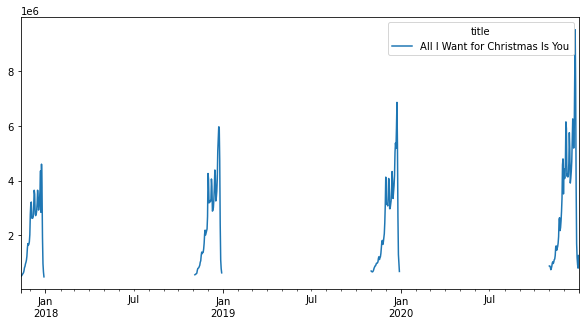

In [139]:
streams_by_song.plot(figsize=(10,5))


Cool - that fixed that problem.  Lets go back to analyzing multiple songs.  We can select the songs we want to look at this way.

In [140]:
number_ones = charts.loc[charts.title.isin(number_one_list)]
streams_by_song = number_ones.pivot_table(index=['date'], columns='title',values='streams')

# Detecting Perodicity in Time Series Data

Lets see if we can detect when a song is periodic every year.  Perhaps there are other Christmas songs that are on the charts?

For a given song, lets keep only the values that are above a certain threshold.  We can see thresholds using the visualization as follows.

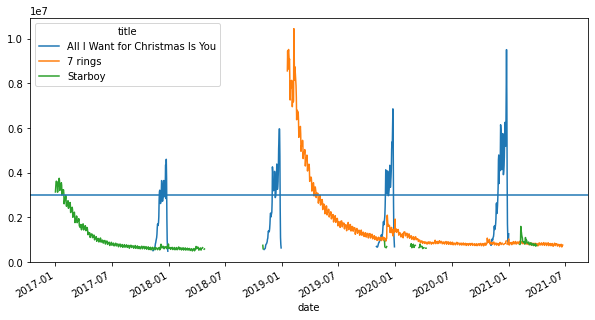

In [141]:

streams_by_song[['All I Want for Christmas Is You','7 rings','Starboy']].plot(figsize=(10,5))
plt.axhline(3000000)


First, we'll keep the values that are high.  Then we'll resample to group them annually, and count them.  When the count is greater than 1 during a year, we can assume its climbed the charts that year.

In [142]:
climbing = streams_by_song['All I Want for Christmas Is You'].where(streams_by_song['All I Want for Christmas Is You']>3000000).resample("1y").count()
climbing

date
2017-12-31    14
2018-12-31    23
2019-12-31    24
2020-12-31    30
2021-12-31     0
Freq: A-DEC, Name: All I Want for Christmas Is You, dtype: int64

If it climbed the charts more than once, we're periodic.

In [143]:
(climbing > 1).sum()

4

That means it hit higher than 3M streams for 4 years.  A song could span more than one year if it is popular over Dec/January, so lets look for songs that were streamed more than 3M times for more than 2 years.

In [144]:
for song in number_one_list:
    climbing = streams_by_song[song].where(streams_by_song[song]>3000000).resample("1y").count()
    if (climbing > 1).sum() > 2:
        print(song)

All I Want for Christmas Is You
Blinding Lights


Maybe we found another regular song?

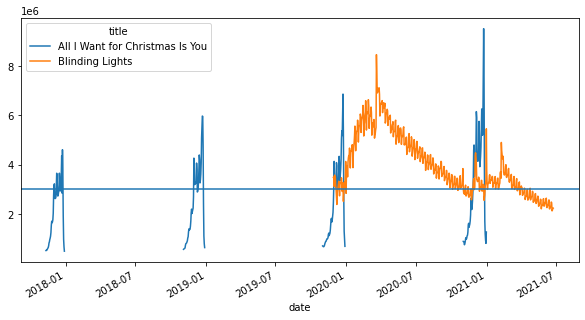

In [145]:
streams_by_song[['All I Want for Christmas Is You','Blinding Lights']].plot(figsize=(10,5))
plt.axhline(3000000)



Nope, just looks like 'Blinding Lights' is a very popular song!  Are there other songs on the list you are interested in?

# Analysis of Audio features of No. 1 Songs

Now that we can see how #1 songs become more and less popular over time, lets have a look at the audio features of the songs to see their characteristics and see if there is any correlation between thm.

Next up:

get audio features for each of the tracks using the API
Get the list of ids from the links

make an API call with the correct credentials
Join it with the table.

First, we'll get the id of each track from the link, and add that to the dataframe

In [146]:
charts['id'] = charts['url'].str[len('https://open.spotify.com/track/'):]
track_id=charts[['id','title','streams']].loc[charts['rank'] == 1]
track_id.set_index('id', inplace=True)
track_id

,title,streams
id,,
4ZtFanR9U6ndgddUvNcjcG,good 4 u,7397613
4ZtFanR9U6ndgddUvNcjcG,good 4 u,7973877
4ZtFanR9U6ndgddUvNcjcG,good 4 u,7851007
4ZtFanR9U6ndgddUvNcjcG,good 4 u,7403306
4ZtFanR9U6ndgddUvNcjcG,good 4 u,8221390
...,...,...
5aAx2yezTd8zXrkmtKl66Z,Starboy,3579206
5aAx2yezTd8zXrkmtKl66Z,Starboy,3619247
5aAx2yezTd8zXrkmtKl66Z,Starboy,3563076


Next, we'll use groupby to aggregate the tracks by id, keeping the Track and the number of times it was streamed (sum), and the number of times it appeared on the chart (count).

In [147]:
track_id = track_id.groupby('id').agg({'title':'first', 'streams':['sum','count']})
track_id

title    streams      
                                                  first        sum count
id                                                                      
0TK2YIli7K1leLovkQiNik                         Señorita  307203347    35
0VjIjW4GlUZAMYd2vXMi3b                  Blinding Lights  314595925    53
0Yde1VrWbGF2Tus2AQhMuT                          Circles    7292777     1
0b9oOr2ZgvyQu88wzixux9                  This Is America   44418293     9
0bAkKNCQfWkexHFn7fIKns                   In My Feelings   99782987    12
...                                                 ...        ...   ...
7ju97lgwC2rKQ6wwsf9no9  Rain On Me (with Ariana Grande)   12589843     2
7lPN2DXiMsVn7XUKtOW1CS                  drivers license  488051658    67
7qiZfU4dY1lWllzX7mPBI3                     Shape of You  702186930    97
7wGoVu4Dady5GV0Sv4UIsx                         rockstar  473791142    90
7ytR5pFWmSjzHJIeQkgog4     ROCKSTAR (feat. Roddy Ricch)  298487450    57

[81 rows x 3 columns]

We flatten the hierarchical columns and rename them like this

In [148]:
track_id.columns = track_id.columns.map('_'.join)
track_id = track_id.rename(columns={'title_first':'title', 'streams_sum':'streams','streams_count':'on_chart'})
track_id

,title,streams,on_chart
id,,,
0TK2YIli7K1leLovkQiNik,Señorita,307203347,35
0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,314595925,53
0Yde1VrWbGF2Tus2AQhMuT,Circles,7292777,1
0b9oOr2ZgvyQu88wzixux9,This Is America,44418293,9
0bAkKNCQfWkexHFn7fIKns,In My Feelings,99782987,12
...,...,...,...
7ju97lgwC2rKQ6wwsf9no9,Rain On Me (with Ariana Grande),12589843,2
7lPN2DXiMsVn7XUKtOW1CS,drivers license,488051658,67
7qiZfU4dY1lWllzX7mPBI3,Shape of You,702186930,97


Cool, we now have the official ids of the number one songs, as well as the total number of times they were streamed over the period, and the number of weeks they were on the chart.

Next, lets used these ids to get the audio features of the songs.

# Getting Data using an API

To get the song features, we need the list of song ids we're interested in.  We can then use this to make an API call to the Spotify service to get information.  To get the list of ids:

In [149]:
track_id.index

Index(['0TK2YIli7K1leLovkQiNik', '0VjIjW4GlUZAMYd2vXMi3b',
       '0Yde1VrWbGF2Tus2AQhMuT', '0b9oOr2ZgvyQu88wzixux9',
       '0bAkKNCQfWkexHFn7fIKns', '0bYg9bo50gSsH3LtXe2SQn',
       '0dbTQYW3Ad1FTzIA9t90E8', '0kPmcPPkjoyfLhUwHLWrk0',
       '0mel2N9Ws9r4yLQn5QE21Y', '0nbXyq5TXYPCO7pr3N8S4I',
       '0sf12qNH5qcw8qpgymFOqD', '0v1x6rN6JHRapa03JElljE',
       '116H0KvKr2Zl4RPuVBruDO', '127QTOFJsJQp5LbJbu3A1y',
       '14msK75pk3pA33pzPVNtBF', '1HfMVBKM75vxSfsQ5VefZ5',
       '1OmcAT5Y8eg5bUPv9qJT4R', '1cTZMwcBJT0Ka3UJPXOeeN',
       '1gm616Plq4ScqNi7TVkZ5N', '1rfofaqEpACxVEHIZBJe6W',
       '1rgnBhdG2JDFTbYkYRZAku', '1xQ6trAsedVPCdbtDAmk0c',
       '24ySl2hOPGCDcxBxFIqWBu', '2Fxmhks0bxGSBdJ92vM42m',
       '2G7V7zsVDxg1yRsu7Ew9RJ', '2VjtYe7gpfUi2OkGxR2O2z',
       '2Vx8E3K5icPZR7OCklWBXX', '2XW4DbS6NddZxRPm5rMCeY',
       '2cnKST6T9qUo2i907lm8zX', '2jt2WxXMCD4zjACthkJQVE',
       '2rPE9A1vEgShuZxxzR2tZH', '2rb5MvYT7ZIxbKW5hfcHx8',
       '2ygvZOXrIeVL4xZmAWJT2C', '35mvY5S1H3J2QZyna3TFe0

Next, lets transform this Series into a list of ids in a big string to get it ready to make an API call.

In [150]:
id_list = ",".join(track_id.index)
id_list

'0TK2YIli7K1leLovkQiNik,0VjIjW4GlUZAMYd2vXMi3b,0Yde1VrWbGF2Tus2AQhMuT,0b9oOr2ZgvyQu88wzixux9,0bAkKNCQfWkexHFn7fIKns,0bYg9bo50gSsH3LtXe2SQn,0dbTQYW3Ad1FTzIA9t90E8,0kPmcPPkjoyfLhUwHLWrk0,0mel2N9Ws9r4yLQn5QE21Y,0nbXyq5TXYPCO7pr3N8S4I,0sf12qNH5qcw8qpgymFOqD,0v1x6rN6JHRapa03JElljE,116H0KvKr2Zl4RPuVBruDO,127QTOFJsJQp5LbJbu3A1y,14msK75pk3pA33pzPVNtBF,1HfMVBKM75vxSfsQ5VefZ5,1OmcAT5Y8eg5bUPv9qJT4R,1cTZMwcBJT0Ka3UJPXOeeN,1gm616Plq4ScqNi7TVkZ5N,1rfofaqEpACxVEHIZBJe6W,1rgnBhdG2JDFTbYkYRZAku,1xQ6trAsedVPCdbtDAmk0c,24ySl2hOPGCDcxBxFIqWBu,2Fxmhks0bxGSBdJ92vM42m,2G7V7zsVDxg1yRsu7Ew9RJ,2VjtYe7gpfUi2OkGxR2O2z,2Vx8E3K5icPZR7OCklWBXX,2XW4DbS6NddZxRPm5rMCeY,2cnKST6T9qUo2i907lm8zX,2jt2WxXMCD4zjACthkJQVE,2rPE9A1vEgShuZxxzR2tZH,2rb5MvYT7ZIxbKW5hfcHx8,2ygvZOXrIeVL4xZmAWJT2C,35mvY5S1H3J2QZyna3TFe0,36ONiya0OANYknz0GgJmwB,39Yp9wwQiSRIDOvrVg7mbk,3BZEcbdtXQSo7OrvKRJ6mb,3HVWdVOQ0ZA45FuZGSfvns,3KkXRkHbMCARz0aVfEt68P,3Uo7WG0vmLQ07WB4BDwy7D,3ZCTVFBt2Brf31RLEnCkWJ,3aQem4jVGdhtg116TmJnHz,3ee8Jmje8o58CHK66QrVC2,3eekarcy7k

Now that we have this we can get the features of songs using the api.

This API call does what we want:

https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features

To test an API we can use this from a console, assuming we have the curl utility installed.

curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=4JpKVNYnVcJ8tuMKjAj50A%2C2NRANZE9UCmPAS5XVbXL40%2C24JygzOLM0EmRQeGtFcIcG" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer XXX"

Notice the Bearer XXX - this is the API key that is needed to make the call. This API requires you to have a Spotify account to obtain a token. If you don't have one, don't worry, we've downloaded the data for you so you can skip this bit.

To obtain a token,

Assuming you have an account you can click on Get Token if needed, copy the token, and use it.

Here's how you make a simple API call

In [151]:
import requests
import json

download_data = False       # enable if we want to get latest data
bearer_token = 'XXXX'       # set to API token

if download_data:
    url = "https://api.spotify.com/v1/audio-features?ids="+id_list

    response = requests.get(url, headers={'Content-Type': 'application/json',
        'Authorization': f'Bearer {bearer_token}'})
    print (response)


If you get a <Response [200]> then everything is OK. If you get 401 then likely you need a valid token. Anything else may need some investigation.

Assuming you got a 200, then response is an object that contains the data we wanted. Lets look at the text.

In [152]:
response.text[:1024]

NameError: name 'response' is not defined

This looks like a JSON document.  JSON is a standard exchange format that is an acronym for Javascript Object Notation.  Python can convert JSON documents to a Dict.

In [ ]:
info = response.text
features = json.loads(info)
features['audio_features'][0]

Cool - we have a Dict containing the feature data for each of the songs!

Before we lose this valuable data we obtained using an API call, lets write it to a file so we can more easily load it up later with out bothering Spotify.

In [ ]:
import json

# load from file if we can't use the API
with open('../datasets/spotify/no1_features.json', 'w') as f:
    json.dump(features, f)

## Using Pre-loaded Data

If you have already saved your data, or you can't access the API, you can load the JSON data into a Python Dict from a previous API call as follows.

In [153]:
import json

with open('../datasets/spotify/no1_features.json', 'r') as file:
    features = json.load(file)

Lets look at the top level keys of this dict:

In [154]:
features.keys()

dict_keys(['audio_features'])

Looks like all of the data is in one key.  This is confirmed [in the documentation](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features):

*On success, the HTTP status code in the response header is 200 OK and the response body contains an object whose key is "audio_features" and whose value is an array of audio features objects in JSON format.*

We can look at the first few features:

In [155]:
features_array = features["audio_features"]
features_array[:2]

[{'danceability': 0.759,
  'energy': 0.54,
  'key': 9,
  'loudness': -6.039,
  'mode': 0,
  'speechiness': 0.0287,
  'acousticness': 0.037,
  'instrumentalness': 0,
  'liveness': 0.0945,
  'valence': 0.75,
  'tempo': 116.947,
  'type': 'audio_features',
  'id': '0TK2YIli7K1leLovkQiNik',
  'uri': 'spotify:track:0TK2YIli7K1leLovkQiNik',
  'track_href': 'https://api.spotify.com/v1/tracks/0TK2YIli7K1leLovkQiNik',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0TK2YIli7K1leLovkQiNik',
  'duration_ms': 190960,
  'time_signature': 4},
 {'danceability': 0.514,
  'energy': 0.73,
  'key': 1,
  'loudness': -5.934,
  'mode': 1,
  'speechiness': 0.0598,
  'acousticness': 0.00146,
  'instrumentalness': 9.54e-05,
  'liveness': 0.0897,
  'valence': 0.334,
  'tempo': 171.005,
  'type': 'audio_features',
  'id': '0VjIjW4GlUZAMYd2vXMi3b',
  'uri': 'spotify:track:0VjIjW4GlUZAMYd2vXMi3b',
  'track_href': 'https://api.spotify.com/v1/tracks/0VjIjW4GlUZAMYd2vXMi3b',
  'analysis_url': 'https://ap

It looks like every object in the array has the same fields.  We can use the pandas method from_dict to load this up into a DataFrame:

In [156]:
features_df = pd.DataFrame.from_dict(features_array)
features_df.set_index('id', inplace=True)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0TK2YIli7K1leLovkQiNik to 7ytR5pFWmSjzHJIeQkgog4
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      81 non-null     float64
 1   energy            81 non-null     float64
 2   key               81 non-null     int64  
 3   loudness          81 non-null     float64
 4   mode              81 non-null     int64  
 5   speechiness       81 non-null     float64
 6   acousticness      81 non-null     float64
 7   instrumentalness  81 non-null     float64
 8   liveness          81 non-null     float64
 9   valence           81 non-null     float64
 10  tempo             81 non-null     float64
 11  type              81 non-null     object 
 12  uri               81 non-null     object 
 13  track_href        81 non-null     object 
 14  analysis_url      81 non-null     object 
 15  duration_ms       81 non-null     int64  
 16  time_signa

Nice!  We have the features for each song!

In [157]:
features_df[:5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
0TK2YIli7K1leLovkQiNik,0.759,0.540,9,-6.039,0,0.0287,0.03700,0.000000,0.0945,0.750,116.947,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
0Yde1VrWbGF2Tus2AQhMuT,0.703,0.756,0,-3.407,1,0.0376,0.22200,0.002810,0.0829,0.536,119.999,audio_features,spotify:track:0Yde1VrWbGF2Tus2AQhMuT,https://api.spotify.com/v1/tracks/0Yde1VrWbGF2...,https://api.spotify.com/v1/audio-analysis/0Yde...,215280,4
0b9oOr2ZgvyQu88wzixux9,0.854,0.463,5,-6.159,1,0.1370,0.11700,0.000000,0.3540,0.549,120.024,audio_features,spotify:track:0b9oOr2ZgvyQu88wzixux9,https://api.spotify.com/v1/tracks/0b9oOr2ZgvyQ...,https://api.spotify.com/v1/audio-analysis/0b9o...,225773,4
0bAkKNCQfWkexHFn7fIKns,0.735,0.482,8,-9.445,1,0.1390,0.00623,0.014400,0.4480,0.315,181.995,audio_features,spotify:track:0bAkKNCQfWkexHFn7fIKns,https://api.spotify.com/v1/tracks/0bAkKNCQfWke...,https://api.spotify.com/v1/audio-analysis/0bAk...,217933,4


Now, we can merge (or join) these tables together.  Instead of using the merge call, we'll use the join call.  The only difference is that join uses the indexes, whereas merge uses columns by default.

In [158]:
track_features = track_id.join(features_df)
track_features.head()

,title,streams,on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,
0TK2YIli7K1leLovkQiNik,Señorita,307203347,35,0.759,0.540,9,-6.039,0,0.0287,0.03700,0.000000,0.0945,0.750,116.947,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,4
0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,314595925,53,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
0Yde1VrWbGF2Tus2AQhMuT,Circles,7292777,1,0.703,0.756,0,-3.407,1,0.0376,0.22200,0.002810,0.0829,0.536,119.999,audio_features,spotify:track:0Yde1VrWbGF2Tus2AQhMuT,https://api.spotify.com/v1/tracks/0Yde1VrWbGF2...,https://api.spotify.com/v1/audio-analysis/0Yde...,215280,4
0b9oOr2ZgvyQu88wzixux9,This Is America,44418293,9,0.854,0.463,5,-6.159,1,0.1370,0.11700,0.000000,0.3540,0.549,120.024,audio_features,spotify:track:0b9oOr2ZgvyQu88wzixux9,https://api.spotify.com/v1/tracks/0b9oOr2ZgvyQ...,https://api.spotify.com/v1/audio-analysis/0b9o...,225773,4
0bAkKNCQfWkexHFn7fIKns,In My Feelings,99782987,12,0.735,0.482,8,-9.445,1,0.1390,0.00623,0.014400,0.4480,0.315,181.995,audio_features,spotify:track:0bAkKNCQfWkexHFn7fIKns,https://api.spotify.com/v1/tracks/0bAkKNCQfWke...,https://api.spotify.com/v1/audio-analysis/0bAk...,217933,4


We now have a table of tracks indexed by id containing the track name, number of streams, time on the chart, and audio features.

Now we can look at the properties of Number 1 songs.

# Average audio features

First, we'll plot the average audio features of these songs.  What do these mean?

* Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
* Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

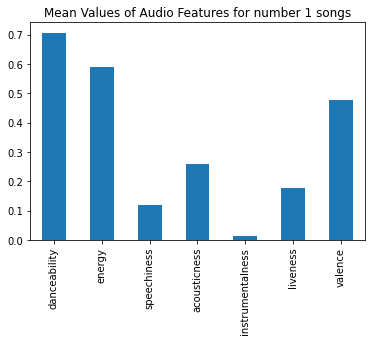

In [159]:
audio_features = ['danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence']
track_features[audio_features].mean().plot.bar()
plt.title('Mean Values of Audio Features for number 1 songs')
plt.show()

Looks like these songs are dancable, high energy, and positive.  Not sure how they compare to songs overall or other types of songs, perhaps on your own playlist, but might be interesting.

Next, lets look at the number of times these songs are stramed.

Mean value for Streams: 126984781.58024691


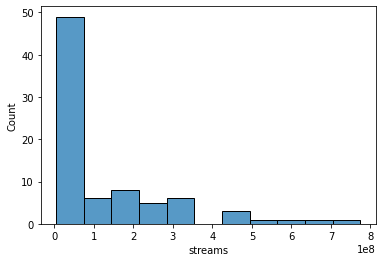

In [160]:
print("Mean value for Streams:", track_features['streams'].mean())
sns.histplot(track_features['streams'])
plt.show()

What does this mean?

Mean value for On the chart: 20.135802469135804


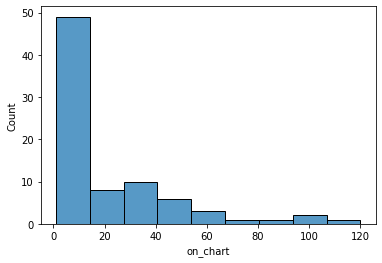

In [161]:
print("Mean value for On the chart:", track_features['on_chart'].mean())
sns.histplot(track_features['on_chart'])
plt.show()

Looks like they aren't on the charts that long, on average around 20 days.

Mean value for danceability: 0.7062469135802468


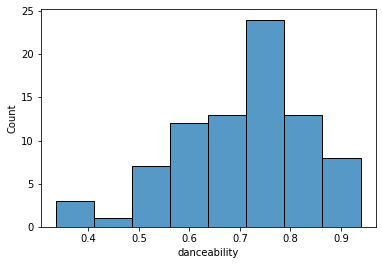

In [162]:
print("Mean value for danceability:", track_features['danceability'].mean())
sns.histplot(track_features['danceability'])
plt.show()

Mean value for energy: 0.5905061728395061


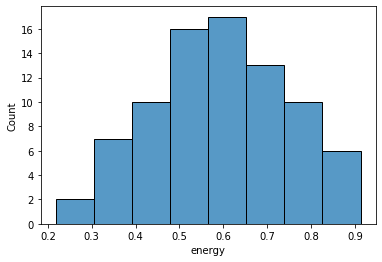

In [163]:
print("Mean value for energy:", track_features['energy'].mean())
sns.histplot(track_features['energy'])
plt.show()

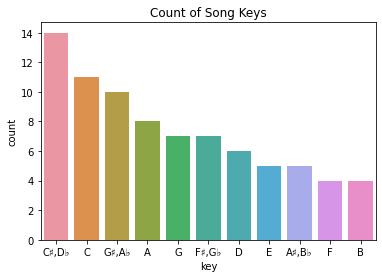

In [164]:
#map the numeric values of key to notes
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
track_features['key'] = track_features['key'].map(key_mapping)

sns.countplot(x = 'key', data=track_features, order=track_features['key'].value_counts().index)
plt.title("Count of Song Keys")
plt.show()

Mean value for loudness: -6.824913580246915
/Users/mike/.virtualenvs/ds1-analytics/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


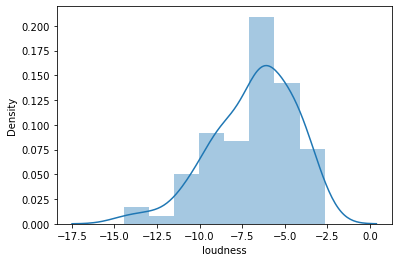

In [165]:
print("Mean value for loudness:", track_features['loudness'].mean())
sns.distplot(track_features['loudness'])
plt.show()

Mean value for mode feature: 0.5185185185185185


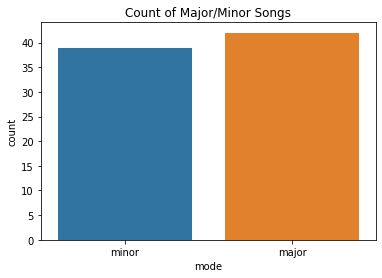

In [166]:
#print mean value for mode
print("Mean value for mode feature:", track_features['mode'].mean())

#map the binary value of mode to major/minor
mode_mapping = {1.0: "major", 0.0: "minor"}
track_features['mode'] = track_features['mode'].map(mode_mapping)

#draw a countplot of the values
sns.countplot(x = 'mode', data=track_features)
plt.title("Count of Major/Minor Songs")
plt.show()

Mean value for speechiness: 0.11798641975308642


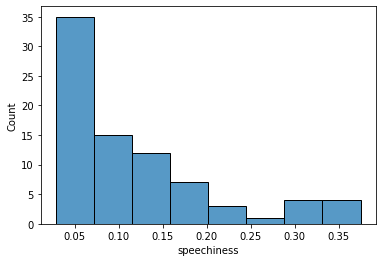

In [167]:
#mean value and distplot for speechiness feature
print("Mean value for speechiness:", track_features['speechiness'].mean())
sns.histplot(track_features['speechiness'])
plt.show()

Mean value for acousticness: 0.2597543456790123


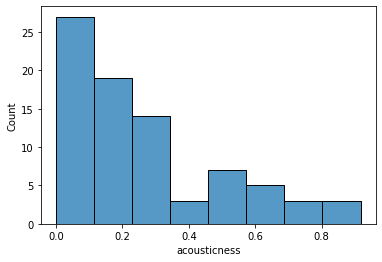

In [168]:
print("Mean value for acousticness:", track_features['acousticness'].mean())
sns.histplot(track_features['acousticness'])
plt.show()

In [169]:
print("Mean value for instrumentalness:", track_features['instrumentalness'].mean())
# sns.histplot(track_features['instrumentalness'])
# plt.show()

Mean value for instrumentalness: 0.012060057777777779


Mean value for liveness: 0.17650617283950618


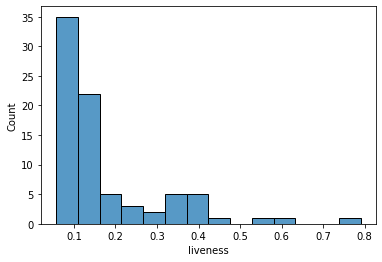

In [170]:
print("Mean value for liveness:", track_features['liveness'].mean())
sns.histplot(track_features['liveness'])
plt.show()

Mean value for valence: 0.47611234567901234


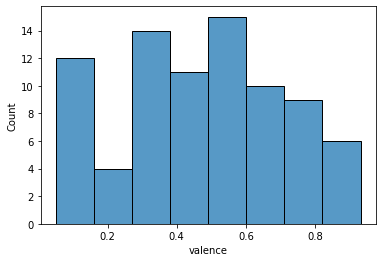

In [171]:
print("Mean value for valence:", track_features['valence'].mean())
sns.histplot(track_features['valence'])
plt.show()

Mean value for tempo: 122.77719753086419


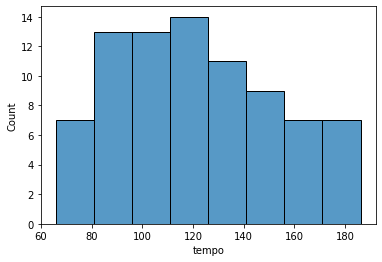

In [172]:
print("Mean value for tempo:", track_features['tempo'].mean())
sns.histplot(track_features['tempo'])
plt.show()

In [173]:
print("Mean value for duration:", track_features['duration_ms'].mean())
# sns.histplot(track_features['duration_ms'], binwidth=3)
# plt.show()

Mean value for duration: 204696.75308641975


Mean value for time_signature feature: 3.9753086419753085


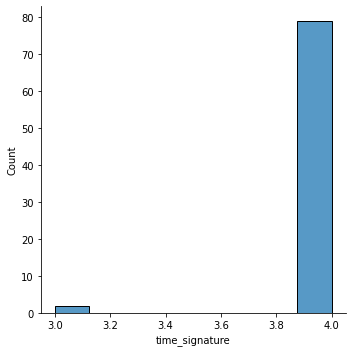

In [174]:
#mean value and distplot for time_signature feature
print('Mean value for time_signature feature:', track_features['time_signature'].mean())
sns.displot(track_features['time_signature'])
plt.show()

Basically all the songs in the playlist are 4/4. Conclusion: People really like songs that are 4/4? (I wonder if we subconsciously notice this or something.)

# Correlation of Features and Popularity

Is there a correlation between song features and how often they are streamed?

In [176]:
col = ['danceability', 'energy', 'loudness', 
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'streams', 'on_chart']
corrMatrix = track_features.loc[:,col].corr()
corrMatrix

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams,on_chart
danceability,1.000000,-0.019474,0.084799,0.406955,-0.295976,-0.046684,0.010026,0.210914,-0.197913,0.038909,0.047600
energy,-0.019474,1.000000,0.804123,-0.185999,-0.467110,-0.318546,-0.092044,0.451842,0.135836,0.006825,0.019185
loudness,0.084799,0.804123,1.000000,-0.203207,-0.513207,-0.426043,-0.067256,0.474201,0.158837,0.069222,0.072676
speechiness,0.406955,-0.185999,-0.203207,1.000000,-0.063659,0.022506,-0.090451,0.049112,0.036178,-0.009837,0.000730
acousticness,-0.295976,-0.467110,-0.513207,-0.063659,1.000000,0.353359,-0.127648,-0.098091,-0.231150,0.081164,0.057570
instrumentalness,-0.046684,-0.318546,-0.426043,0.022506,0.353359,1.000000,-0.038789,-0.146112,-0.013318,-0.081961,-0.083135
liveness,0.010026,-0.092044,-0.067256,-0.090451,-0.127648,-0.038789,1.000000,-0.060951,-0.046050,-0.067516,-0.078680
valence,0.210914,0.451842,0.474201,0.049112,-0.098091,-0.146112,-0.060951,1.000000,0.055579,0.101527,0.075462
tempo,-0.197913,0.135836,0.158837,0.036178,-0.231150,-0.013318,-0.046050,0.055579,1.000000,-0.097510,-0.105507
streams,0.038909,0.006825,0.069222,-0.009837,0.081164,-0.081961,-0.067516,0.101527,-0.097510,1.000000,0.985397


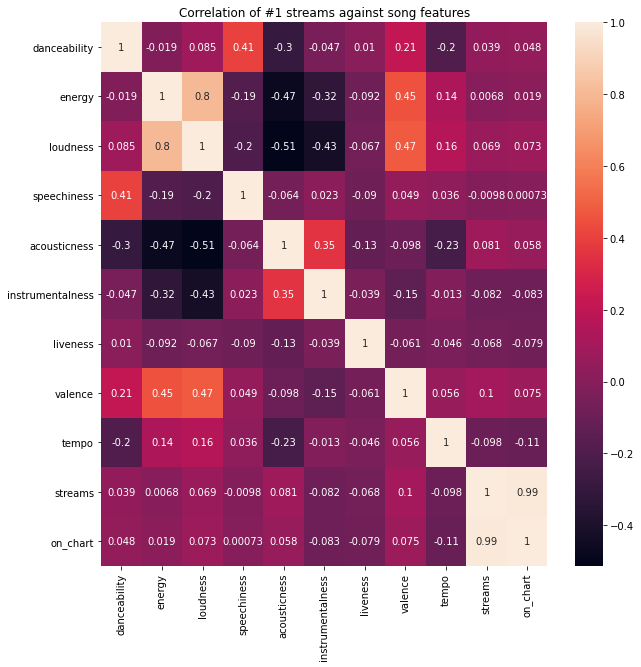

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation of #1 streams against song features")
plt.show()

It doesn't look like there is any correlation between the total number of streams and features of the songs. 

What other questions can we ask about the chart data?

e.g. https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de

# Choosing Visualizations
How do we choose the right visualizations?

![Visualizations](images/visualizations.png)


https://www.kaggle.com/alexisbcook/choosing-plot-types-and-custom-styles

Since it's not always easy to decide how to best tell the story behind your data, the chart types can be broken down into three broad categories to help you decide
* Trends - A trend is defined as a pattern of change.
  * Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
* Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
  * Bar charts are useful for comparing quantities corresponding to different groups.
  * Heatmaps can be used to find color-coded patterns in tables of numbers.
  * Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable.
    * sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables using 
    * sns.lmplot - is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups.
    * sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable.
* Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
  * Histograms show the distribution of a single numerical variable.
  * sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables).
  * sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable.

# Challenges

Update this project to use the latest data at https://www.kaggle.com/dhruvildave/spotify-charts.  It is now a big CSV file...

How could you visualize what artists are the most popular?  For example, count of the number of songs by artist and produce a bar graph.

Can you retrieve the lyrics of some of the songs and determine whether they are positive or negative?  Use the https://pypi.org/project/lyricsgenius/

How can you compare the difference in features between number 1 songs and other songs in the data?  E.g. danceability in number 1 songs, and all other songs in the data?

References:

* https://towardsdatascience.com/visualizing-spotify-songs-with-python-an-exploratory-data-analysis-fc3fae3c2c09